In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import stlstuff as sls
import imagestuff as ims

import copy 
import os
import time
from sys import platform
from scipy.interpolate import griddata
import retrievestuff
import Fourier_Filter;
#import importlib; importlib.reload(Fourier_Filter)

#import f90nml

In [2]:
%matplotlib notebook

In [3]:
# Have to do this in case of different operating systems
if platform == "linux" or platform == "darwin":
    slash = '/'
else: # This is assumed to be Windows
    slash = '\\'
#print(slash)

In [4]:
#Iwantsyntheticdata = False
Iwantsyntheticdata = True

if Iwantsyntheticdata:
    
    # Load a height file (for synthetic data)
    sollast = np.loadtxt("Fri Mar  1 14_36_55 2019"+slash+"surface.txt")
    sollast = sollast - np.mean(sollast)
    Ny, Nx = np.shape(sollast); #print(sollast.shape) #print(Nx,Ny)
    Lx = 30; Ly = 31

    # Getting the x,y grids
    x = np.linspace(0,Lx,Nx); dx = x[1]-x[0]
    y = np.linspace(0,Ly,Ny); dy = y[1]-y[0]
    xgrid,ygrid = np.meshgrid(x,y); #print(xgrid.shape)

else:
    # Load the height file (for real data)
    npzfile = np.load("Case2.1"+slash+"Segmentsretrieved.npz")
    nx1list = npzfile['nx1list']
    nx2list = npzfile['nx2list']
    ny1list = npzfile['ny1list']
    ny2list = npzfile['ny2list']
    solution = npzfile['solution']
    nsegments = len(nx1list)
    accumlist = [5]
    sollast = get_heights(\
                  nsegments,nx1list,nx2list,ny1list,ny2list,dx,dy,solution,\
                  accumlist)


In [5]:
# Plot the surface as a mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, sollast)
ax.set_xlabel('x')
ax.set_ylabel('y')

<IPython.core.display.Javascript object>

Text(0.5,0,'y')

<IPython.core.display.Javascript object>


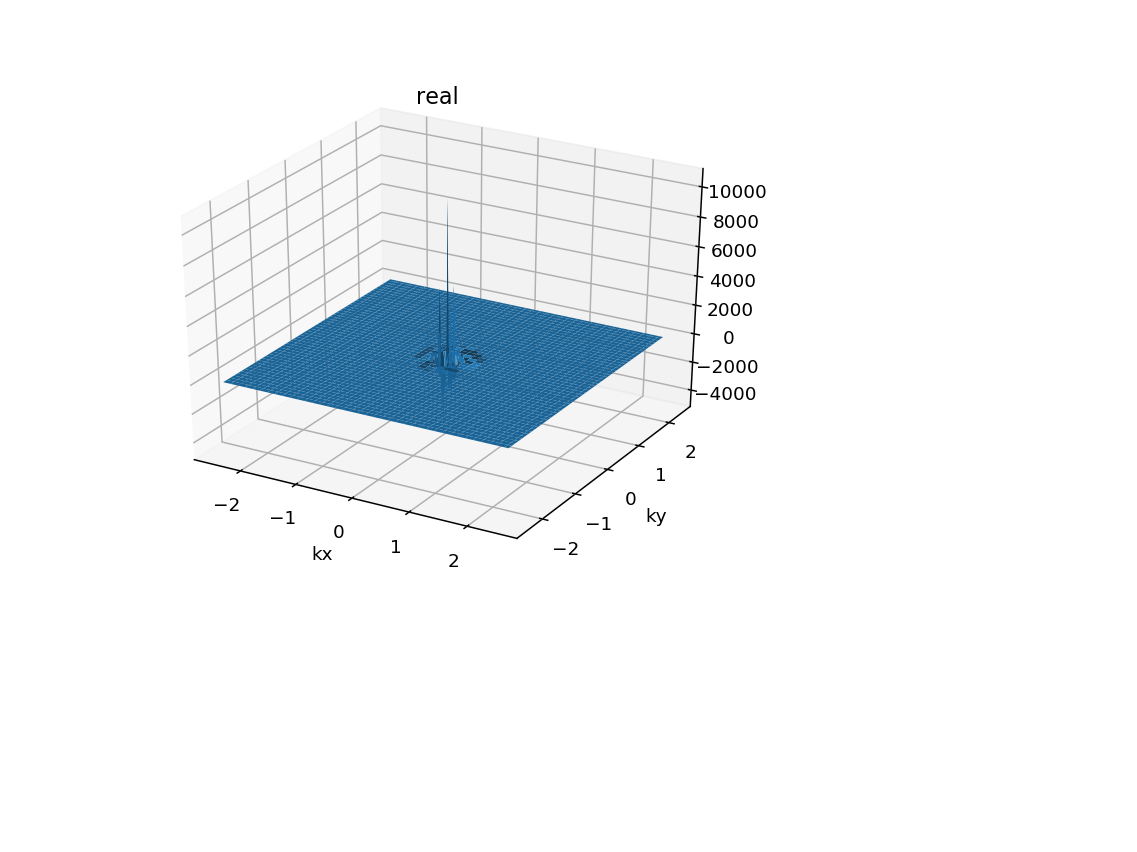

<IPython.core.display.Javascript object>


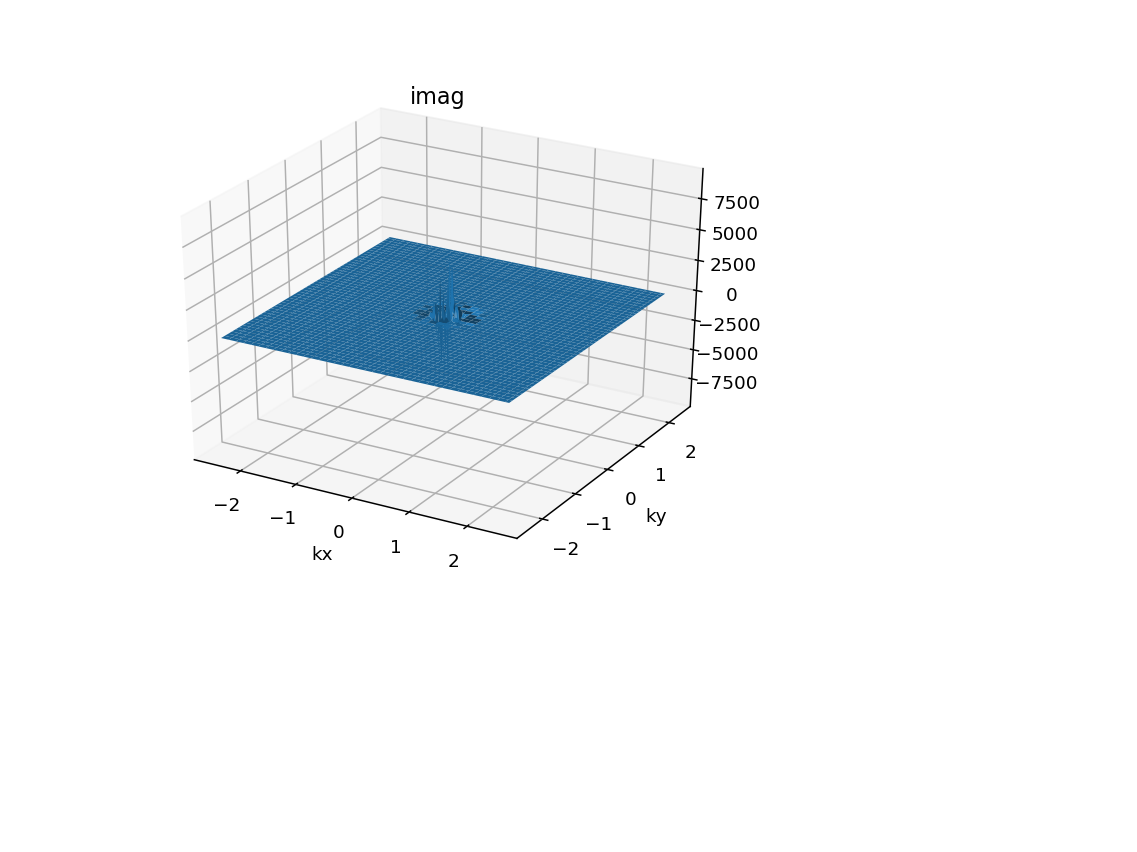

Text(0.5,0.92,'imag')

In [6]:
# Fourier transform it
sollast_FTshift,kxshiftgrid,kyshiftgrid = Fourier_Filter.FT(sollast,x,y)

# Plot real and imaginary parts
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kxshiftgrid, kyshiftgrid, np.real(sollast_FTshift))
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_title('real')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kxshiftgrid, kyshiftgrid, np.imag(sollast_FTshift))
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_title('imag')

In [7]:
# First make a copy of the Fourier representation
sollast_FTshift_filtered = sollast_FTshift*1

# Apply a mask
kmax = 1.5
for ix in range(Nx):
    for iy in range(Ny):
        ktest = np.sqrt(kxshiftgrid[iy,ix]**2+kyshiftgrid[iy,ix]**2)
        if(ktest>kmax):
            sollast_FTshift_filtered[iy,ix]=0

<IPython.core.display.Javascript object>


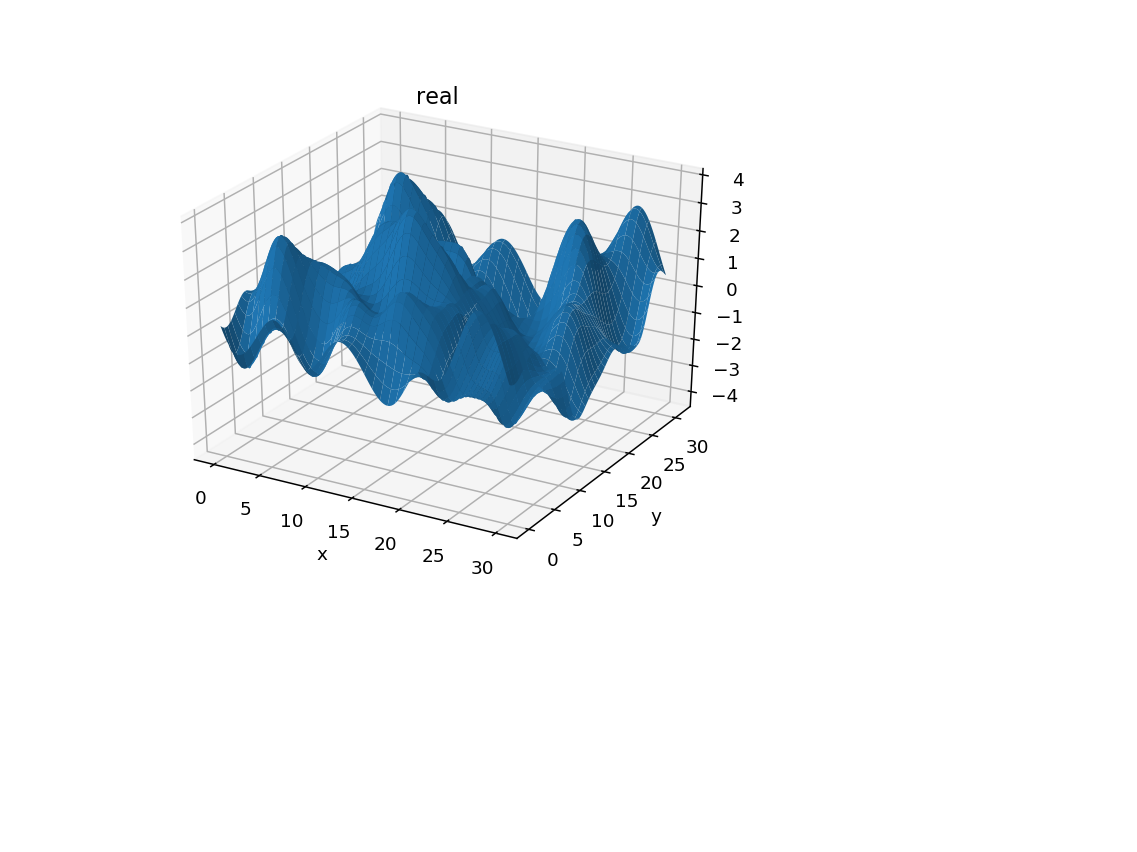

<IPython.core.display.Javascript object>


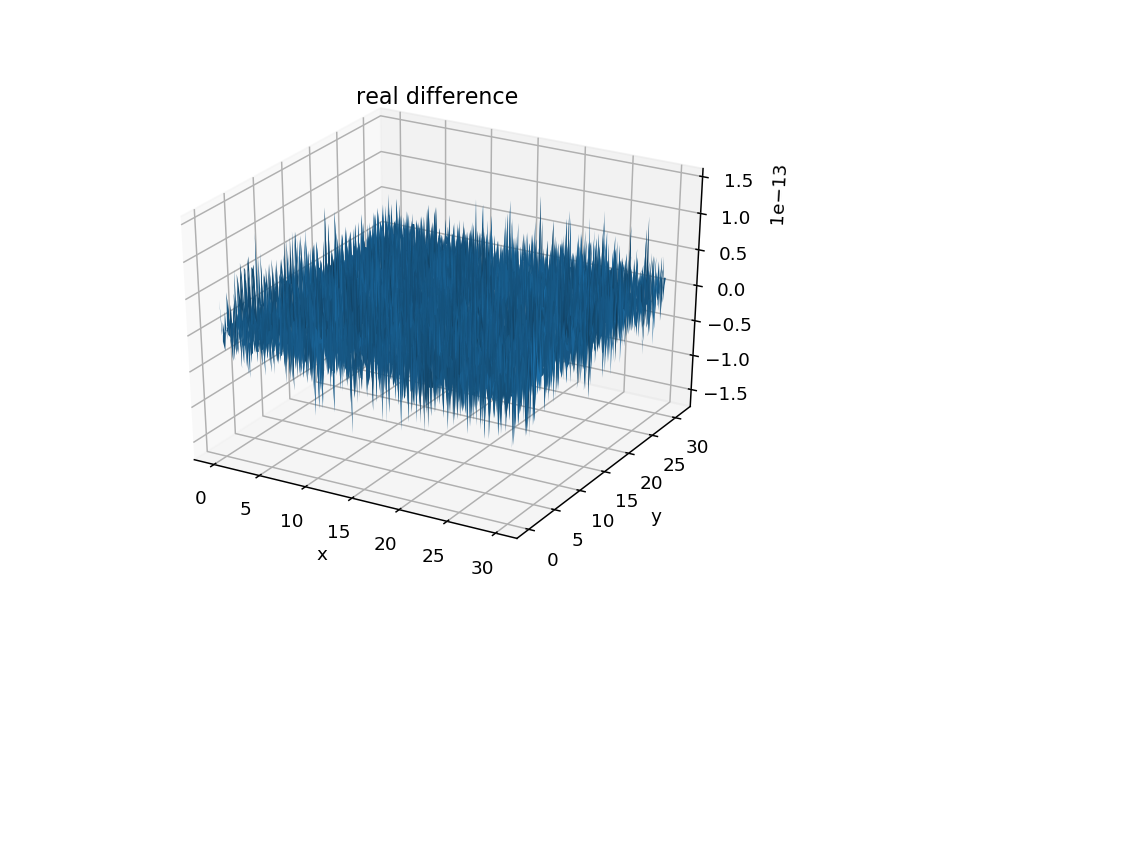

<IPython.core.display.Javascript object>


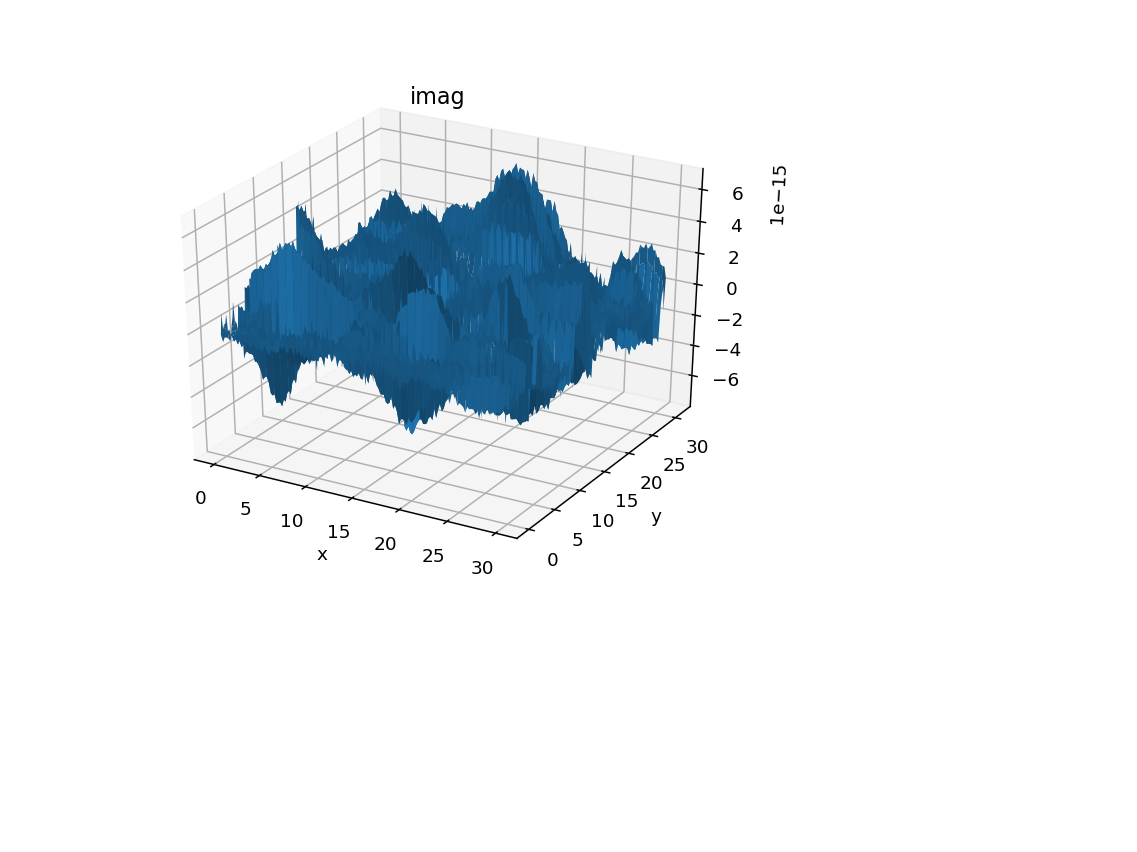

Text(0.5,0.92,'imag')

In [8]:
# Inverse FT
sollast_FT_filtered_IFT = Fourier_Filter.IFT(sollast_FTshift_filtered)

# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, np.real(sollast_FT_filtered_IFT))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('real')

# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, np.real(sollast_FT_filtered_IFT-sollast))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('real difference')

# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, np.imag(sollast_FT_filtered_IFT))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('imag')